In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv("SwimDataTop50.csv",";")

C:\Users\lukas\AppData\Local\Temp\ipykernel_4104\3450534495.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv("SwimDataTop50.csv",";")


In [3]:

# Function to parse time strings with variable formats
def parse_custom_time(time_str):
    format = len(str(time_str).split(":"))

    if format == 1:
        return pd.to_timedelta(f'00:00:{time_str}')
    elif format == 2:
        return pd.to_timedelta(f'00:{time_str}')
    elif format == 3:
        return pd.to_timedelta(time_str)



# Convert 'time' column to timedelta using the custom function
df['time'] = df['time'].apply(parse_custom_time)

df['time_seconds'] = df['time'].dt.total_seconds()

df['speed'] = df['distance'] / df['time_seconds']

c:\Users\lukas\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


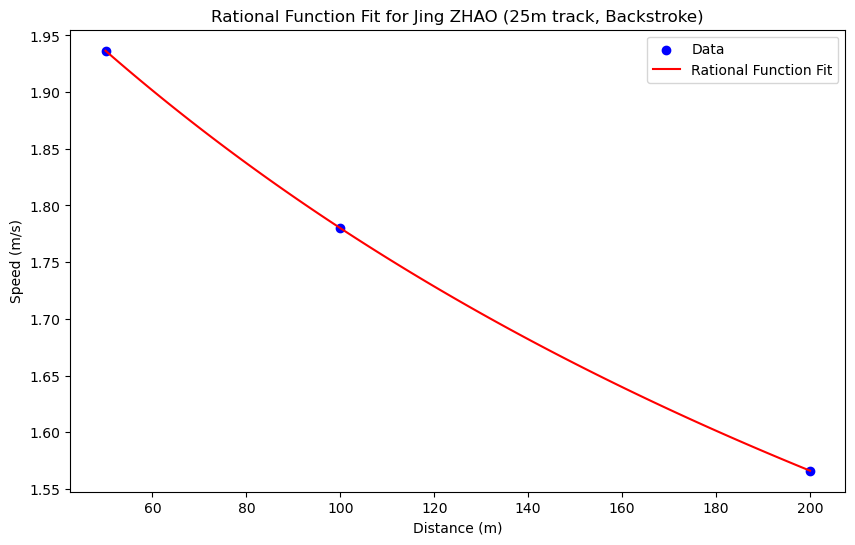

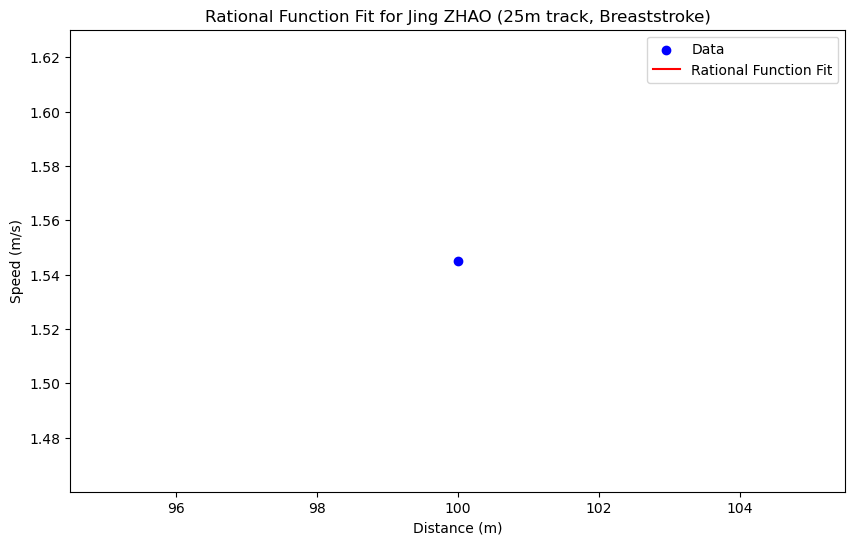

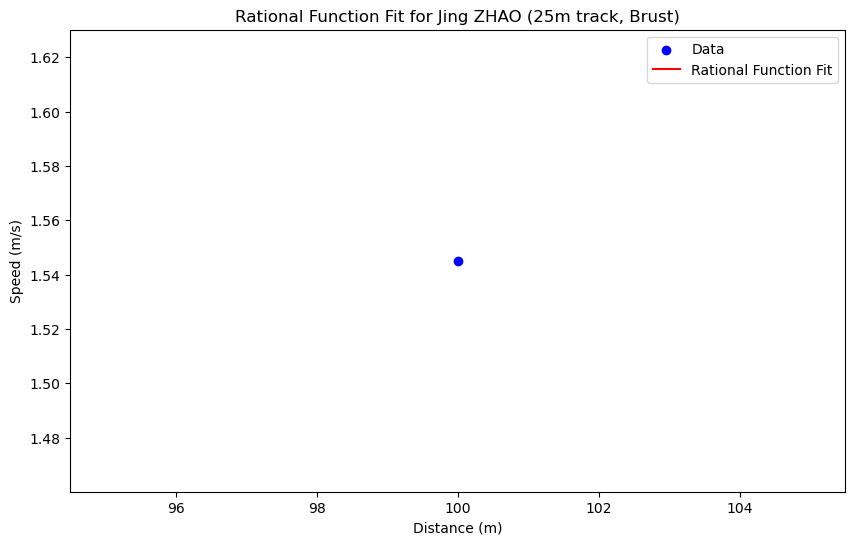

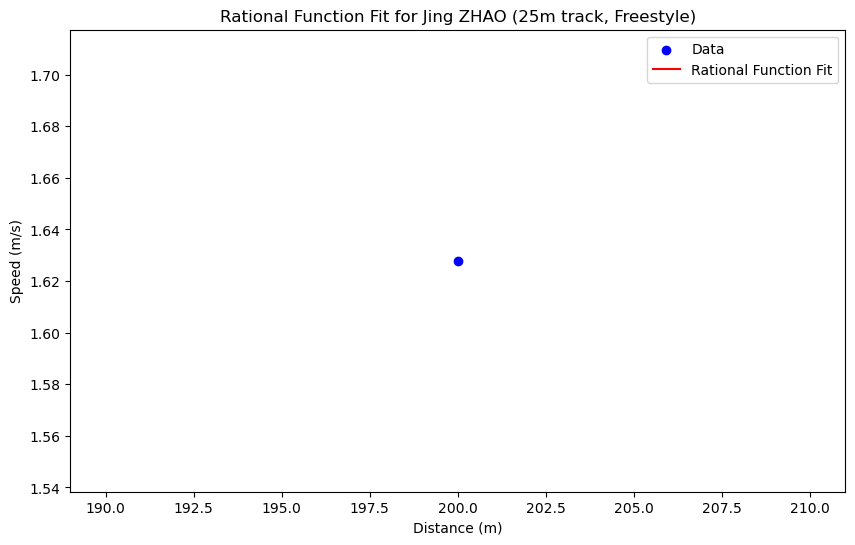

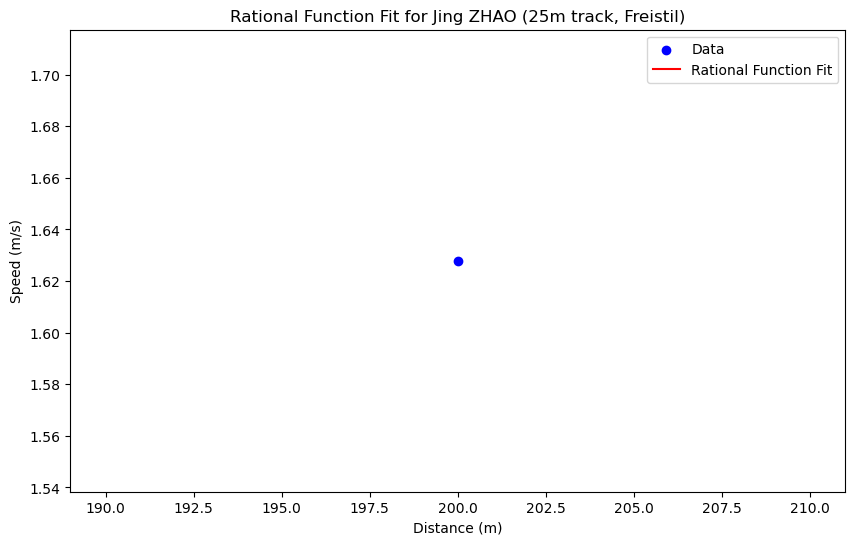

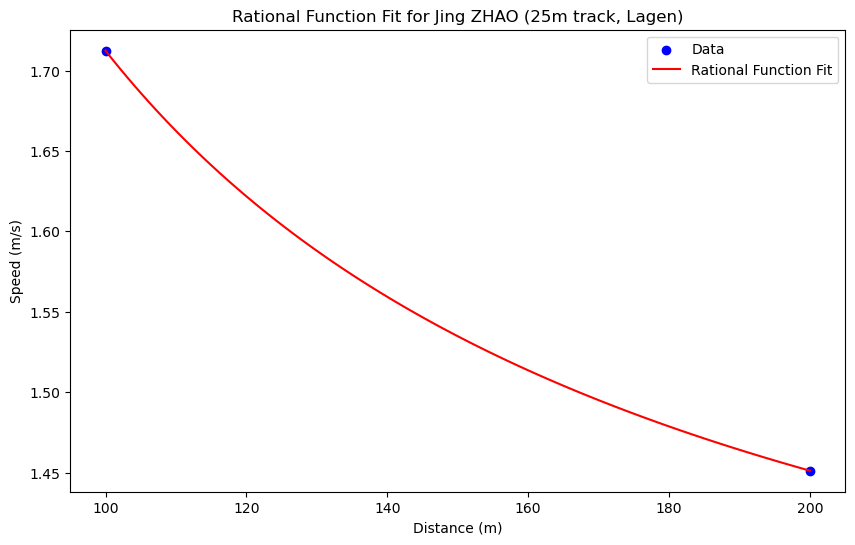

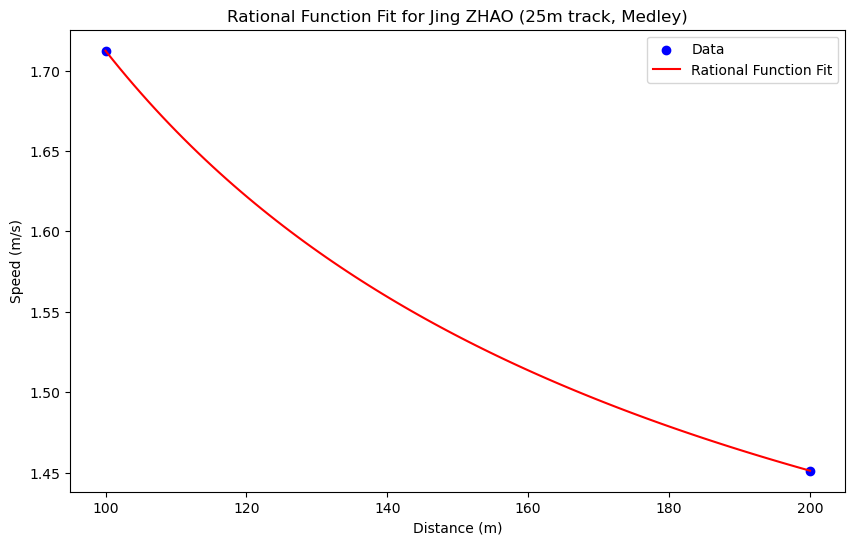

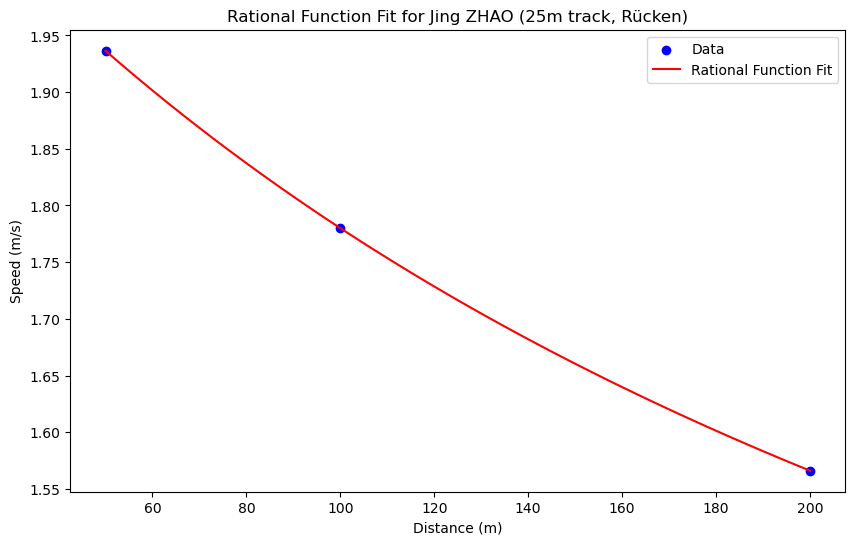

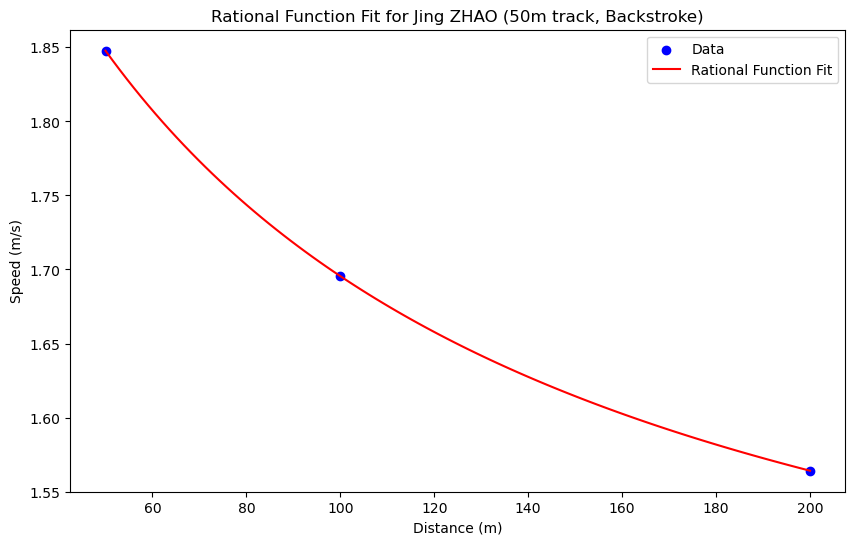

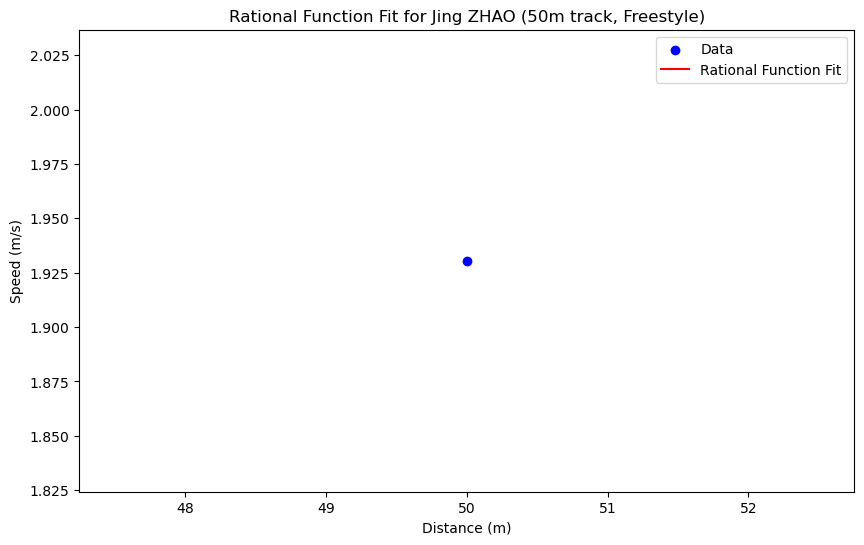

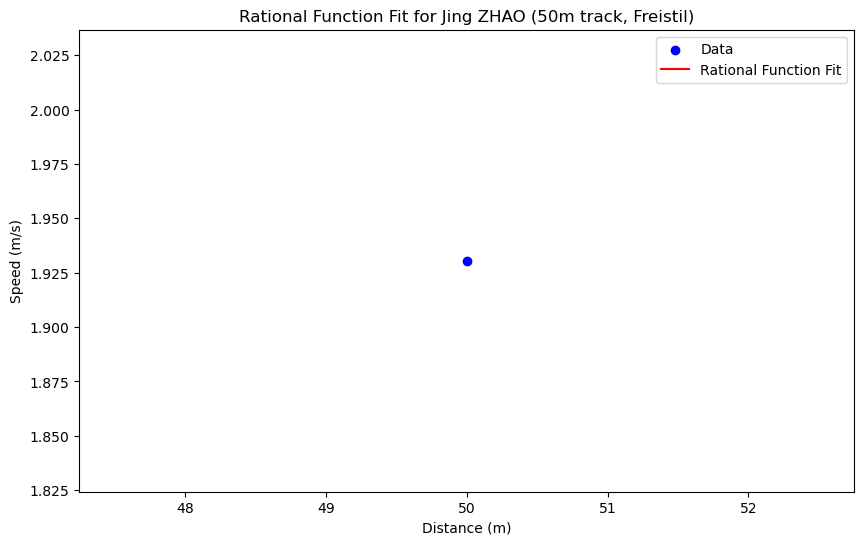

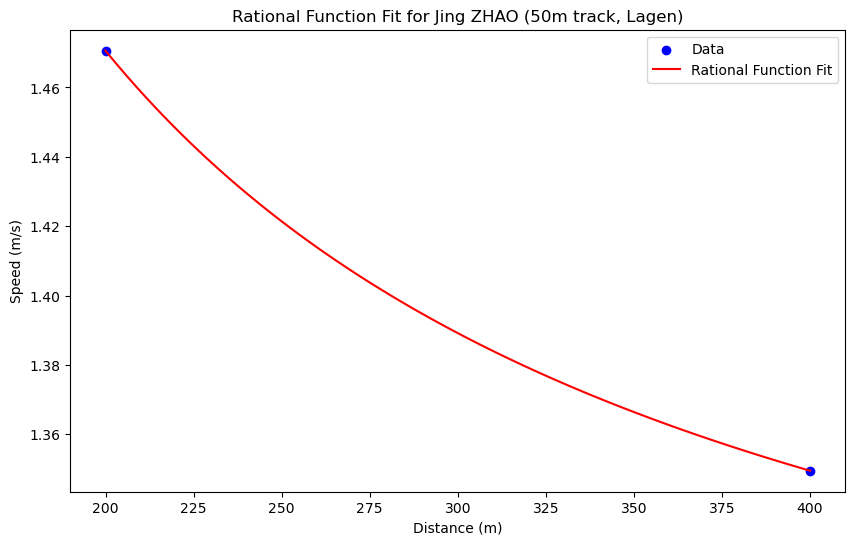

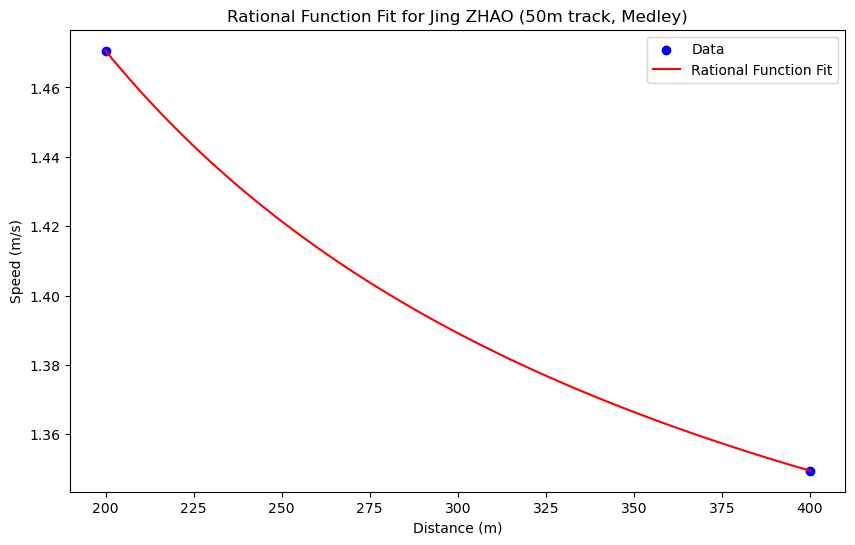

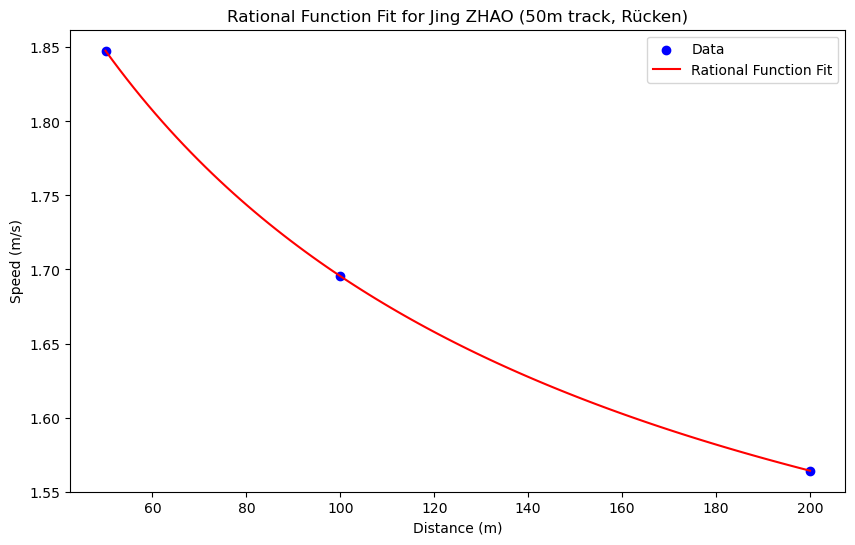

In [23]:

# Group the data by 'surname', 'firstname', 'track length', 'technique'
grouped_data = df.groupby(['surname', 'firstname', 'track length', 'technique'])

grouped_data.size()


def fit_rational_function(x, a, b, c, d):
    return (a * x + b) / (c * x + d)

def plot_rational_function(distance, speed, ax, title):
    params, covariance = curve_fit(fit_rational_function, distance, speed, method='dogbox')

    x_range = np.linspace(distance.min(), distance.max(), 100)
    y_pred = fit_rational_function(x_range, *params)

    # Ensure predicted values are non-negative
    y_pred = np.maximum(y_pred, 0)

    ax.scatter(distance, speed, color='blue', label='Data')
    ax.plot(x_range, y_pred, color='red', label='Rational Function Fit')
    ax.set_title(title)
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Speed (m/s)')
    ax.legend()

# Function to filter data for a specific swimmer and plot the rational function fit
def plot_rational_function_for_swimmer(df, firstname, lastname):
    filtered_df = df[(df['firstname'] == firstname) & (df['surname'] == lastname)]

    if filtered_df.empty:
        print(f"No data found for {firstname} {lastname}.")
        return

    grouped_data = filtered_df.groupby(['track length', 'technique'])

    for (track_length, technique), group in grouped_data:
        plt.figure(figsize=(10, 6))
        plot_rational_function(group['distance'], group['speed'], plt.gca(), f"Rational Function Fit for {firstname} {lastname} ({track_length}m track, {technique})")
        plt.show()



plot_rational_function_for_swimmer(df, firstname='Jing', lastname='ZHAO')